In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import NMF

In [3]:
# Import Data
kinematicData = pd.read_csv('CoM-M3-WT-20220420.csv')

# Data Preview
kinematicData.head()

kinData = np.array(kinematicData)

rangeBegin = 37359
rangeEnd = 37735

# Making sure I'm not eyeballing indices
index = kinematicData.columns.get_loc('36 CoMx (cm)')
print(index)
index = kinematicData.columns.get_loc('15 Hipx (cm)')
print(index)
index = kinematicData.columns.get_loc('16 Hipy (cm)')
print(index)
index = kinematicData.columns.get_loc('29 HRx (cm)')
print(index)
index = kinematicData.columns.get_loc('30 HRy (cm)')
print(index)

# Assign time along X axis
time = kinData[rangeBegin:rangeEnd,0]
treadmillSpeed = kinData[rangeBegin:rangeEnd,3]
CoM = kinData[rangeBegin:rangeEnd,35]
hipY = kinData[rangeBegin:rangeEnd,15]
hipX= kinData[rangeBegin:rangeEnd,16]
hindlimbRightX = kinData[rangeBegin:rangeEnd, 29]
hindlimbRightY = kinData[rangeBegin:rangeEnd, 30]

# Getting Extrapolated CoM (xCoM)
xCoM = CoM + ((treadmillSpeed * CoM) / np.sqrt(980.665 / hipY))

35
15
16
29
30


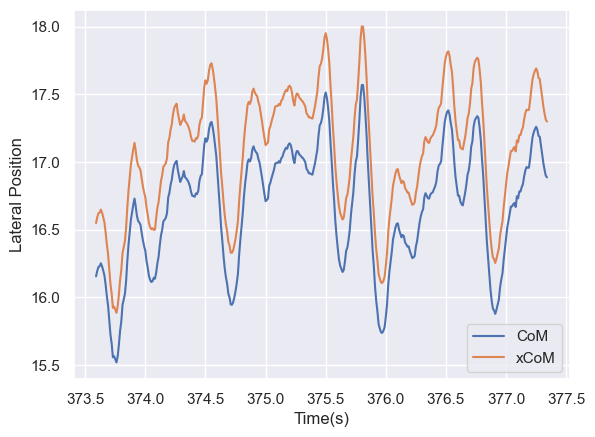

In [4]:

# Plotting
sns.set()
plt.plot(time, CoM, label='CoM')
plt.plot(time, xCoM, label='xCoM')
# plt.plot(time, hipX, label="Right Hip X")
# plt.plot(time, hipY)
# plt.plot(time, hindlimbRightY, label="Hindlimb Y")
plt.ylabel("Lateral Position")
plt.xlabel("Time(s)")
plt.legend(loc='lower right')
# plt.plot(time, hindlimbRight)

In [ ]:
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_